In [12]:
%load_ext autoreload
 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from pfs.lam.opdb import *

In [14]:
from Cluster_GetImqual2csv import main as getImqual
from Cluster_GetBestFocusPlanefromCsv import main as getBestFocus

In [16]:
from multiprocessing import Pool
import time
import os
import numpy as np

# Limit the number of core 
## otherwise affect to None

In [ ]:
MAX_PROCESS = 30

# Data to be process
to be specified:  arm, specId and visit_set_id (or experimentId)

In [8]:
site = "Subaru"
specId = 4
arm = "r"
#expId = 3396

experimentId = 30048

peaklist = "/work/fmadec/spsAIT/202312/SM4_Sub_14Dec2023_peakList.csv"
outpath = "/work/fmadec/spsAIT/202312"

In [9]:
roi_size = 24
seek_size = None
doBck = True

criteria = "EE5"
piston_index ="motor1"

cam = f"{arm}{specId}"

# DRP folder

In [17]:

#drpPath, repo, rerun = "/work/", "drp", "drpActor/CALIB"
drpPath, repo, rerun = "/data/drp", "repo", "drpActor/CALIB"



define outputs, plots


In [18]:


roiPlot = True
plotPeaksFlux = True
doFit = False
doLSF = False

In [ ]:
visitStart, visitEnd = getVisitRange_fromWeb(experimentId, url="http://133.40.164.16/sps-logs/index.html")

print(visitStart, visitEnd)


In [ ]:
def task(i, peaklist=peaklist, cam=cam, rerun=rerun, experimentId=experimentId, outpath=outpath, drpPath=drpPath, repo=repo, \
                                roi_size=roi_size, seek_size=seek_size, doBck=doBck, roiPlot=roiPlot, plotPeaksFlux=plotPeaksFlux, doFit=doFit, doLSF=doLSF):
    return getImqual(i, peaklist, cam, rerun, experimentId, outpath, drpPath, repo, \
                                roi_size, seek_size, doBck, roiPlot, plotPeaksFlux, doFit, doLSF)


In [ ]:
visitIds = range(visitStart, visitEnd+1)
print(f"{len(visitIds)} visits")

In [ ]:
MAX_PROCESS = os.cpu_count() if MAX_PROCESS is None else MAX_PROCESS
print(MAX_PROCESS)

In [ ]:
if __name__ == '__main__':
    pool_size = min(os.cpu_count(), len(visitIds), MAX_PROCESS)
    p = Pool(processes = pool_size)
    start = time.time()
    async_result = p.map_async(task, visitIds)
    p.close()
    p.join()
    print("Complete")
    end = time.time()
    print('total time (s)= ' + str(end-start))

# Best Focus 

In [10]:
filtered_waves = None #[763.7208,912.5471]
#filtered_waves = [912.5471]
#filtered_waves = [970.688]
filtered_waves = [966.0435]

In [19]:
filtered_waves = filtered_waves if filtered_waves is None else np.array(filtered_waves)
getBestFocus(experimentId, cam, rerun, criteria, outpath, drpPath, repo, roi_size, doBck, piston_index, filtered_waves)


2023-12-14T04h55
/work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/

/work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/Imquality_r4_Exp30048*

Wavelength used: [696.7352 826.6794 912.5471 966.0435 795.0362 727.494 ]
[  2  32 111 223 289 339 418 518 621 650] [696.7352 727.494  795.0362 826.6794 912.5471 966.0435]
[966.0435]
966.04 filtered

 write ThFocus plot png file: /work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/Exp30048_thfocus_fit_bounds_086_163_err_max_motor1_2023-12-14T04h55 

Spatial Tip -6.574e-04 rad => -40.4 microns
Spectral Tilt -4.806e-04 rad => -30.1 microns
bestFocus 90.5 microns
2023-12-14 04:55:24.346942 
/work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/
ExpId 30048
InvMat_sm1_R1_17sept2020.mat
[107.57066896  67.3689907   89.12731683]
xcu_r4 motors moveCcd a=107.57 b=67.37 c=89.13 microns abs
Tip -6.574e-04 rad => -40.4 microns
Tilt -4.806e-04 rad => -30.1 microns
90.5 microns



/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetBestFocusPlanefromCsv.py:185: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_groups(piston_filtered.sort_values("motor1")[piston_filtered.EE5_nbh_flag], experimentId, dataPath, plot_prefix=plot_prefix, title_suffix=title_suffix,\


write png file: 
 /work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/Focus_Piston_plots_doBckTrue_EE5_bounds_086_163_err_max_motor1_fiber_wavelength_Exp30048_2023-12-14T04h55.png


/home/fmadec/devel/lam_sps_devel/notebooks/devel/fmadec/subaru/Cluster_GetBestFocusPlanefromCsv.py:187: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_groups(piston_filtered.sort_values("motor1")[piston_filtered.EE5_nbh_flag], experimentId, dataPath, plot_prefix=plot_prefix, title_suffix=title_suffix,\


# Check throughFocus plot:
and Use filtered_waves above if needed  and recalculate the best focus

Copy paste the image path from the line <b>write ThFocus plot png file:</b> above (and add .png)

In [20]:
thFocusPlot = "/work/fmadec/spsAIT/202312/sm4/Exp30048/drpActor/CALIB/roi24/doBckTrue/Exp30048_thfocus_fit_bounds_086_163_err_max_motor1_2023-12-14T04h55.png"

In [21]:
from IPython.display import display, Image

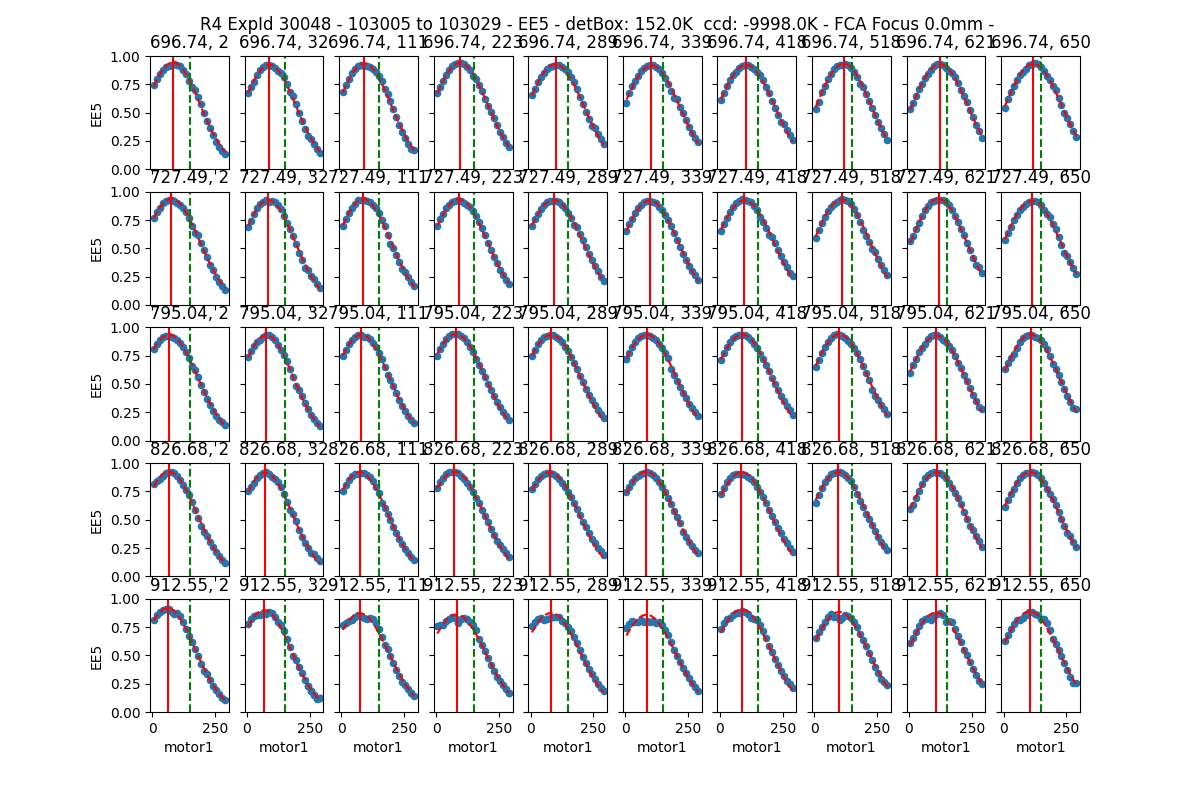

In [22]:
display(Image(thFocusPlot))

In [ ]:
testPath =  "/work/fmadec/spsAIT/202312/sm2/Exp30017/drpActor/CALIB/roi24/doBckTrue/"